<a href="https://colab.research.google.com/github/yeesem/Advanced-Tensorflow-Specialization/blob/main/Simple_Auto_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [23]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Prepare and preview the dataset

In [24]:
def generate_data(m):
    '''plots m random points on a 3D plane'''

    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:,0] = np.cos(angles) + np.sin(angles)/2 + 0.1 * np.random.randn(m)/2
    data[:,1] = np.sin(angles) * 0.7 + 0.1 * np.random.randn(m) / 2
    data[:,2] = data[:, 0] * 0.1 + data[:, 1] * 0.3 + 0.1 * np.random.randn(m)

    return data

<ipython-input-25-89ddec0dda0d>:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(X_train[:,0],X_train[:,1],X_train[:,2],cmap = 'Reds');


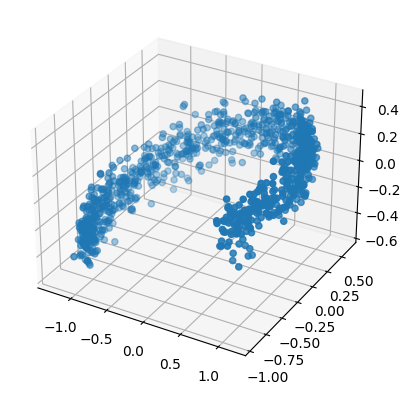

In [25]:
X_train = generate_data(1000)

# X_train.mean(axis=0): This calculates the mean of X_train along the specified axis.
# Here, axis=0 means the mean is computed for each column (feature) of the data.

# keepdims=0: The keepdims parameter in numpy.mean controls whether the reduced dimensions
# are kept in the result. When keepdims=0 (which is equivalent to False), the reduced dimensions
# (in this case, the dimension along which the mean was computed) are not kept, resulting
# in a 1-dimensional array of means.

X_train = X_train - X_train.mean(axis = 0,keepdims = 0)

# Preview the data
ax = plt.axes(projection = '3d')
ax.scatter3D(X_train[:,0],X_train[:,1],X_train[:,2],cmap = 'Reds');

# Build the Model

In [26]:
encoder = keras.models.Sequential([keras.layers.Dense(2,input_shape = [3])])
decoder = keras.models.Sequential([keras.layers.Dense(3,input_shape = [2])])

autoencoder = keras.models.Sequential([encoder,decoder])

# Compile the Model

In [27]:
autoencoder.compile(
    loss = 'mse',
    optimizer = keras.optimizers.SGD(lr = 0.1)
)

# Train the Model

In [28]:
history = autoencoder.fit(
    X_train,
    X_train,
    epochs = 200
)

Epoch 1/200
32/32 [==============================] - 1s 3ms/step - loss: 0.0679
Epoch 2/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0598
Epoch 3/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0559
Epoch 4/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0537
Epoch 5/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0523
Epoch 6/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0512
Epoch 7/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0504
Epoch 8/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0498
Epoch 9/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0492
Epoch 10/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0486
Epoch 11/200
32/32 [==============================] - 0s 2ms/step - loss: 0.0481
Epoch 12/200
32/32 [==============================] - 0s 3ms/step - loss: 0.0476
Epoch 13/200
32/32 [=================

# Plot the encoder output

In [29]:
# Encode the data
codings = encoder.predict(X_train)

# see a sample input-encoder output pair
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')

32/32 [==============================] - 0s 1ms/step
input point: [0.25200011 0.46339312 0.16188009]
encoded point: [-0.5401288  -0.14799096]


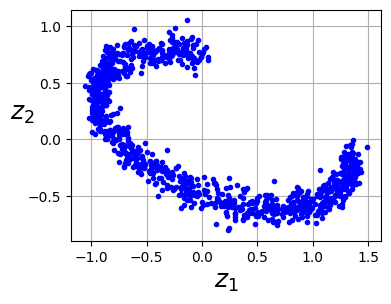

In [30]:
# plot all encoder outputs
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

# Plot the Decoder Output

In [31]:
decodings = decoder.predict(codings)

# see a sample output for a single point
print(f'input point: {X_train[0]}')
print(f'encoded point: {codings[0]}')
print(f'decoded point: {decodings[0]}')

32/32 [==============================] - 0s 1ms/step
input point: [0.25200011 0.46339312 0.16188009]
encoded point: [-0.5401288  -0.14799096]
decoded point: [0.26008633 0.45453897 0.17857072]


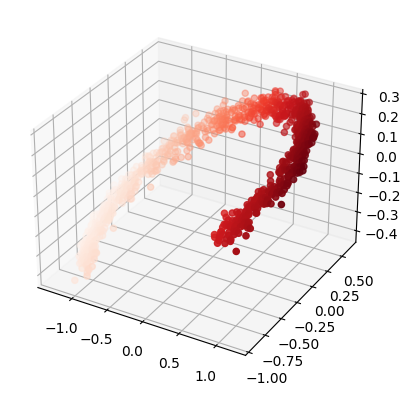

In [32]:
# plot the decoder output
ax = plt.axes(projection='3d')
ax.scatter3D(decodings[:, 0], decodings[:, 1], decodings[:, 2], c=decodings[:, 0], cmap='Reds');

In [33]:
X_train

array([[ 0.25200011,  0.46339312,  0.16188009],
       [ 0.85250896, -0.27841154,  0.14796787],
       [-1.08033277, -0.51413165, -0.19781721],
       ...,
       [ 0.71634437,  0.51813471,  0.3207755 ],
       [ 0.73861818,  0.48347296,  0.37714587],
       [ 0.52382273,  0.4777175 ,  0.20502456]])